- https://vincentarelbundock.github.io/Rdatasets/doc/openintro/resume.html
- https://vincentarelbundock.github.io/Rdatasets/csv/openintro/resume.csv

In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [258]:
df = pd.read_csv('resume.csv')
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_columns

Index(['job_city', 'job_industry', 'job_type', 'job_ownership',
       'job_req_min_experience', 'job_req_school', 'firstname', 'race',
       'gender', 'resume_quality'],
      dtype='object')

In [260]:
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [261]:
df.fillna(df.median(numeric_only=True), inplace=True)

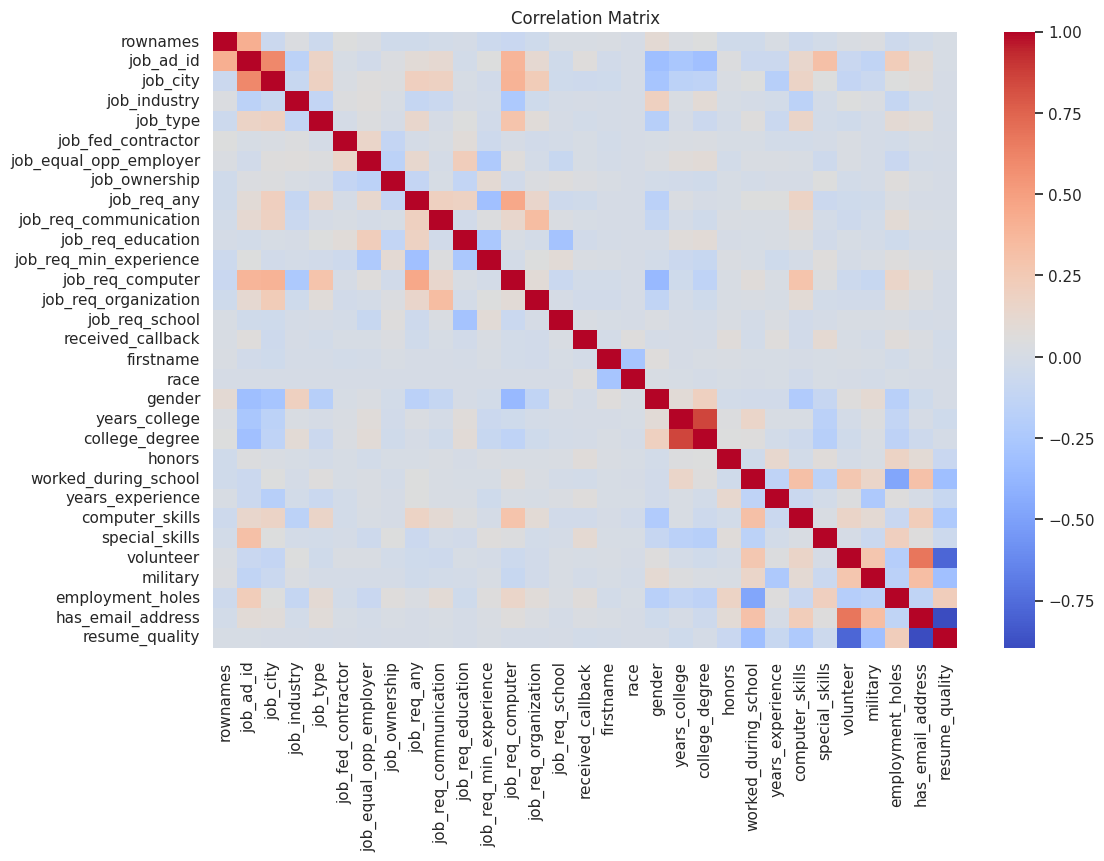

In [262]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


In [263]:
target_corr = correlation_matrix["received_callback"].sort_values(ascending=False)

threshold = 0.01
selected_features = target_corr[(target_corr.abs() >= threshold) & (target_corr.index != "received_callback")].index
print("\nSelected features based on correlation threshold:\n", selected_features)

X_selected = df[selected_features]
y = df["received_callback"]


Selected features based on correlation threshold:
 Index(['special_skills', 'honors', 'employment_holes', 'job_ad_id',
       'years_experience', 'race', 'job_ownership', 'has_email_address',
       'job_req_school', 'job_req_min_experience', 'rownames', 'gender',
       'firstname', 'military', 'job_type', 'job_req_computer',
       'resume_quality', 'worked_during_school', 'computer_skills',
       'job_req_organization', 'job_req_education', 'job_req_any', 'job_city'],
      dtype='object')


In [264]:
X = df.drop(["received_callback", "rownames"], axis=1)
y = df["received_callback"]

In [265]:
def rf_prediction(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22051662, stratify=y)

    model = RandomForestClassifier(random_state=22051662)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred): .4f}")
    print(f"Classification Report: \n{classification_report(y_test, y_pred, zero_division=0)}",)
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

In [266]:
def dt_prediction(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22051662, stratify=y)

    model = DecisionTreeClassifier(random_state=22051662)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred): .4f}")
    print(f"Classification Report: \n{classification_report(y_test, y_pred, zero_division=0)}",)
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

In [267]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop("received_callback", axis=1)
y = df["received_callback"]

class_counts = y.value_counts()
print("Class distribution before SMOTE:\n", class_counts)

if class_counts.min() / class_counts.max() < 0.6:
    smote = SMOTE(random_state=22051662)
    X_smote, y_smote = smote.fit_resample(X, y)
    print("Class distribution after SMOTE:\n", y.value_counts())


Class distribution before SMOTE:
 received_callback
0    4478
1     392
Name: count, dtype: int64
Class distribution after SMOTE:
 received_callback
0    4478
1     392
Name: count, dtype: int64


### Random Forests

In [268]:
print("Classic:")
rf_prediction(X, y)

Classic:
Accuracy:  0.9179
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1343
           1       0.25      0.01      0.02       118

    accuracy                           0.92      1461
   macro avg       0.58      0.50      0.49      1461
weighted avg       0.87      0.92      0.88      1461

Confusion Matrix: 
[[1340    3]
 [ 117    1]]


In [269]:
print("Selected Features:")
rf_prediction(X_selected, y)

Selected Features:
Accuracy:  0.9192
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1343
           1       0.50      0.02      0.03       118

    accuracy                           0.92      1461
   macro avg       0.71      0.51      0.50      1461
weighted avg       0.89      0.92      0.88      1461

Confusion Matrix: 
[[1341    2]
 [ 116    2]]


- Using Smote (Synthetic Minority Oversampling Technique) 

In [270]:
print("SMOTE")
rf_prediction(X_smote, y_smote)

SMOTE
Accuracy:  0.9531
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1343
           1       0.98      0.93      0.95      1344

    accuracy                           0.95      2687
   macro avg       0.95      0.95      0.95      2687
weighted avg       0.95      0.95      0.95      2687

Confusion Matrix: 
[[1311   32]
 [  94 1250]]


### Decision Trees

In [271]:
print("Classic:")
dt_prediction(X, y)

Classic:
Accuracy:  0.8665
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1343
           1       0.22      0.25      0.24       118

    accuracy                           0.87      1461
   macro avg       0.58      0.59      0.58      1461
weighted avg       0.88      0.87      0.87      1461

Confusion Matrix: 
[[1236  107]
 [  88   30]]


In [272]:
print("Selected Features:")
dt_prediction(X_selected, y)

Selected Features:
Accuracy:  0.8665
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1343
           1       0.21      0.24      0.22       118

    accuracy                           0.87      1461
   macro avg       0.57      0.58      0.58      1461
weighted avg       0.87      0.87      0.87      1461

Confusion Matrix: 
[[1238  105]
 [  90   28]]


In [273]:
print("SMOTE")
dt_prediction(X_smote, y_smote)

SMOTE
Accuracy:  0.8951
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1343
           1       0.88      0.92      0.90      1344

    accuracy                           0.90      2687
   macro avg       0.90      0.90      0.90      2687
weighted avg       0.90      0.90      0.90      2687

Confusion Matrix: 
[[1174  169]
 [ 113 1231]]
